# Heart failure prediction using clinical records

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
df.shape

(5000, 13)

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Length: 5000, dtype: bool

In [6]:
df.duplicated().sum()

3680

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(1320, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 4972
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1320 non-null   float64
 1   anaemia                   1320 non-null   int64  
 2   creatinine_phosphokinase  1320 non-null   int64  
 3   diabetes                  1320 non-null   int64  
 4   ejection_fraction         1320 non-null   int64  
 5   high_blood_pressure       1320 non-null   int64  
 6   platelets                 1320 non-null   float64
 7   serum_creatinine          1320 non-null   float64
 8   serum_sodium              1320 non-null   int64  
 9   sex                       1320 non-null   int64  
 10  smoking                   1320 non-null   int64  
 11  time                      1320 non-null   int64  
 12  DEATH_EVENT               1320 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 144.4 KB


In [9]:
numerical_data = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
categorical_data = df[['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]

In [10]:
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
outliers = ((numerical_data < lower_bound) | (numerical_data > upper_bound)).any(axis=1)
outliers

0       False
1        True
2       False
3       False
4        True
        ...  
4731    False
4855    False
4862    False
4965    False
4972    False
Length: 1320, dtype: bool

In [12]:
df = df[~outliers]
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
5,70.0,0,232,1,30,0,302000.00,1.20,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.20,145,0,0,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [13]:
numerical_data = df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']]
categorical_data = df[['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]

In [14]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,976.0,59.958338,11.543209,40.0,50.00,60.00,68.0,95.0
creatinine_phosphokinase,976.0,318.183402,265.625196,25.0,110.75,200.00,582.0,1211.0
ejection_fraction,976.0,38.067623,11.517191,14.0,30.00,38.00,45.0,65.0
platelets,976.0,257377.139355,75609.432555,62000.0,208000.00,263358.03,304250.0,454000.0
serum_creatinine,976.0,1.084754,0.295332,0.5,0.90,1.00,1.2,1.9
serum_sodium,976.0,137.245902,3.702942,125.0,135.00,137.00,140.0,148.0
time,976.0,135.792008,76.830795,4.0,75.75,121.00,207.0,285.0


In [15]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    728
1    248
Name: count, dtype: int64

In [16]:
df['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0    0.745902
1    0.254098
Name: proportion, dtype: float64

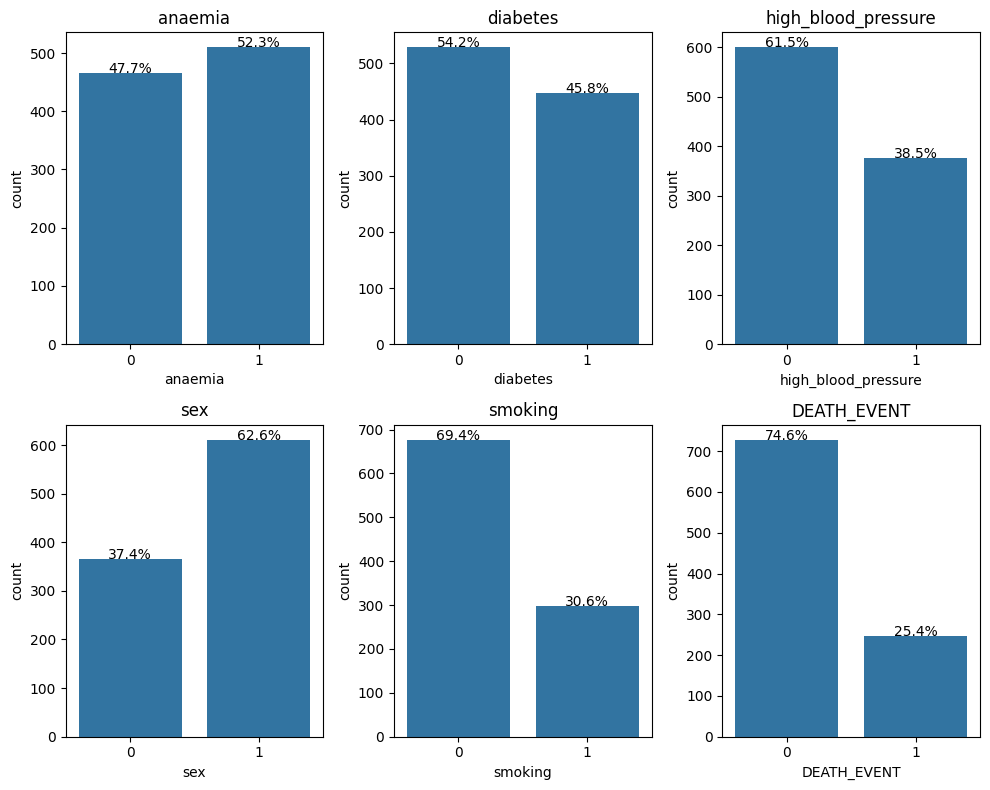

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
axes = axes.flatten()

for i, column in enumerate(categorical_data):
    total_count = len(df[column])
    ax = axes[i]
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(column)

    # Convert count to percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

plt.tight_layout()
plt.show()

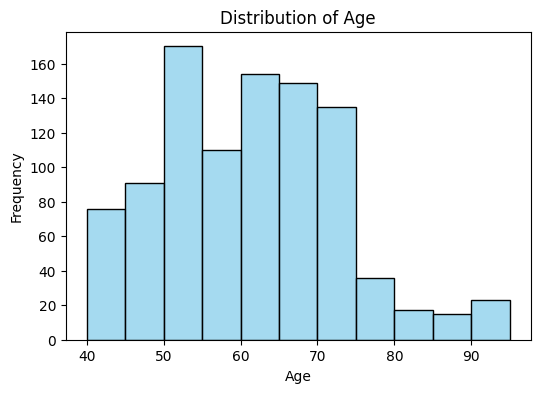

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=11, kde=False, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

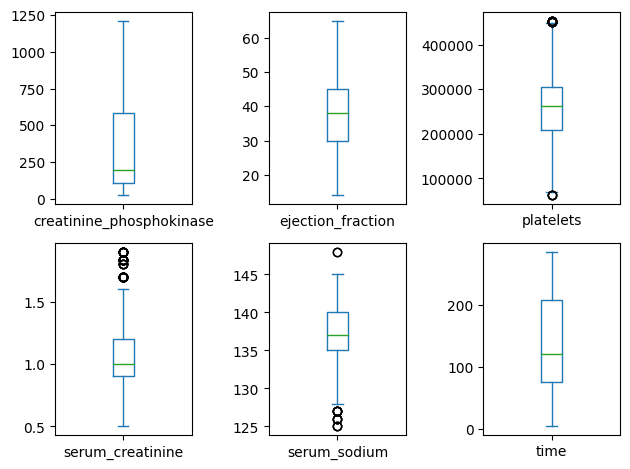

In [19]:
numerical_data_new = numerical_data.iloc[:, 1:]

# Create a new figure to hold the box plots
plt.figure()

# Create a for loop to iterate over the columns
for i, column in enumerate(numerical_data_new.columns):
    # Create a subplot for each column
    plt.subplot(2, 3, i+1)
    df[column].plot(kind = 'box')


# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure with all the box plots
plt.show()

In [20]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.066421,0.042743,-0.044746,0.090531,0.193738,-0.044015,0.133975,0.030586,0.050924,0.035086,-0.178537,0.220239
anaemia,0.066421,1.000000,-0.213816,0.038800,0.022366,0.040147,0.019208,-0.015529,0.045221,-0.030831,-0.058914,-0.083420,0.100877
creatinine_phosphokinase,0.042743,-0.213816,1.000000,-0.051835,-0.021793,-0.004996,-0.010405,0.060622,-0.103434,-0.007035,-0.035412,0.091719,0.042023
diabetes,-0.044746,0.038800,-0.051835,1.000000,0.064272,0.003360,0.037987,-0.007002,-0.130530,-0.177795,-0.213861,0.017540,-0.007473
ejection_fraction,0.090531,0.022366,-0.021793,0.064272,1.000000,0.086798,0.144731,-0.276213,0.161004,-0.097002,0.001116,0.082483,-0.298448
high_blood_pressure,0.193738,0.040147,-0.004996,0.003360,0.086798,1.000000,0.037445,-0.037713,0.024200,-0.062594,-0.087638,-0.258590,0.113448
platelets,-0.044015,0.019208,-0.010405,0.037987,0.144731,0.037445,1.000000,-0.104172,0.033996,-0.072272,0.053409,-0.002314,-0.069794
serum_creatinine,0.133975,-0.015529,0.060622,-0.007002,-0.276213,-0.037713,-0.104172,1.000000,-0.237458,0.113024,0.021298,-0.105398,0.356081
serum_sodium,0.030586,0.045221,-0.103434,-0.130530,0.161004,0.024200,0.033996,-0.237458,1.000000,-0.070515,0.018902,0.026428,-0.185034
sex,0.050924,-0.030831,-0.007035,-0.177795,-0.097002,-0.062594,-0.072272,0.113024,-0.070515,1.000000,0.440152,0.026392,0.081452


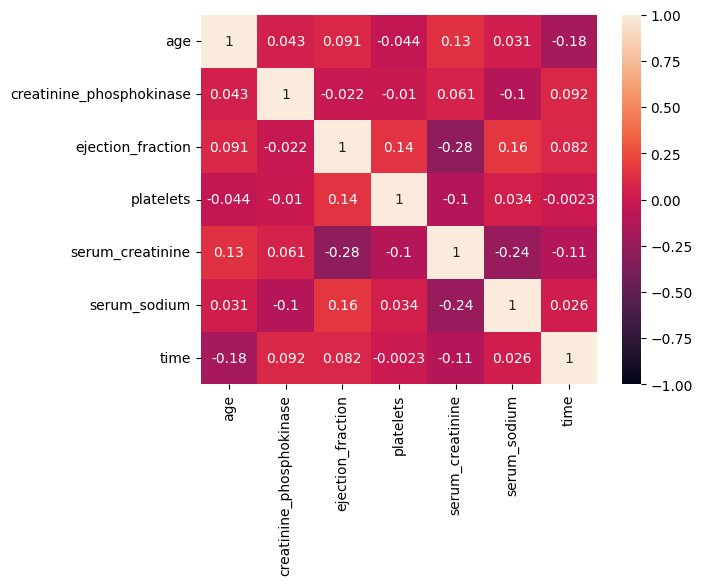

In [21]:
sns.heatmap(numerical_data.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

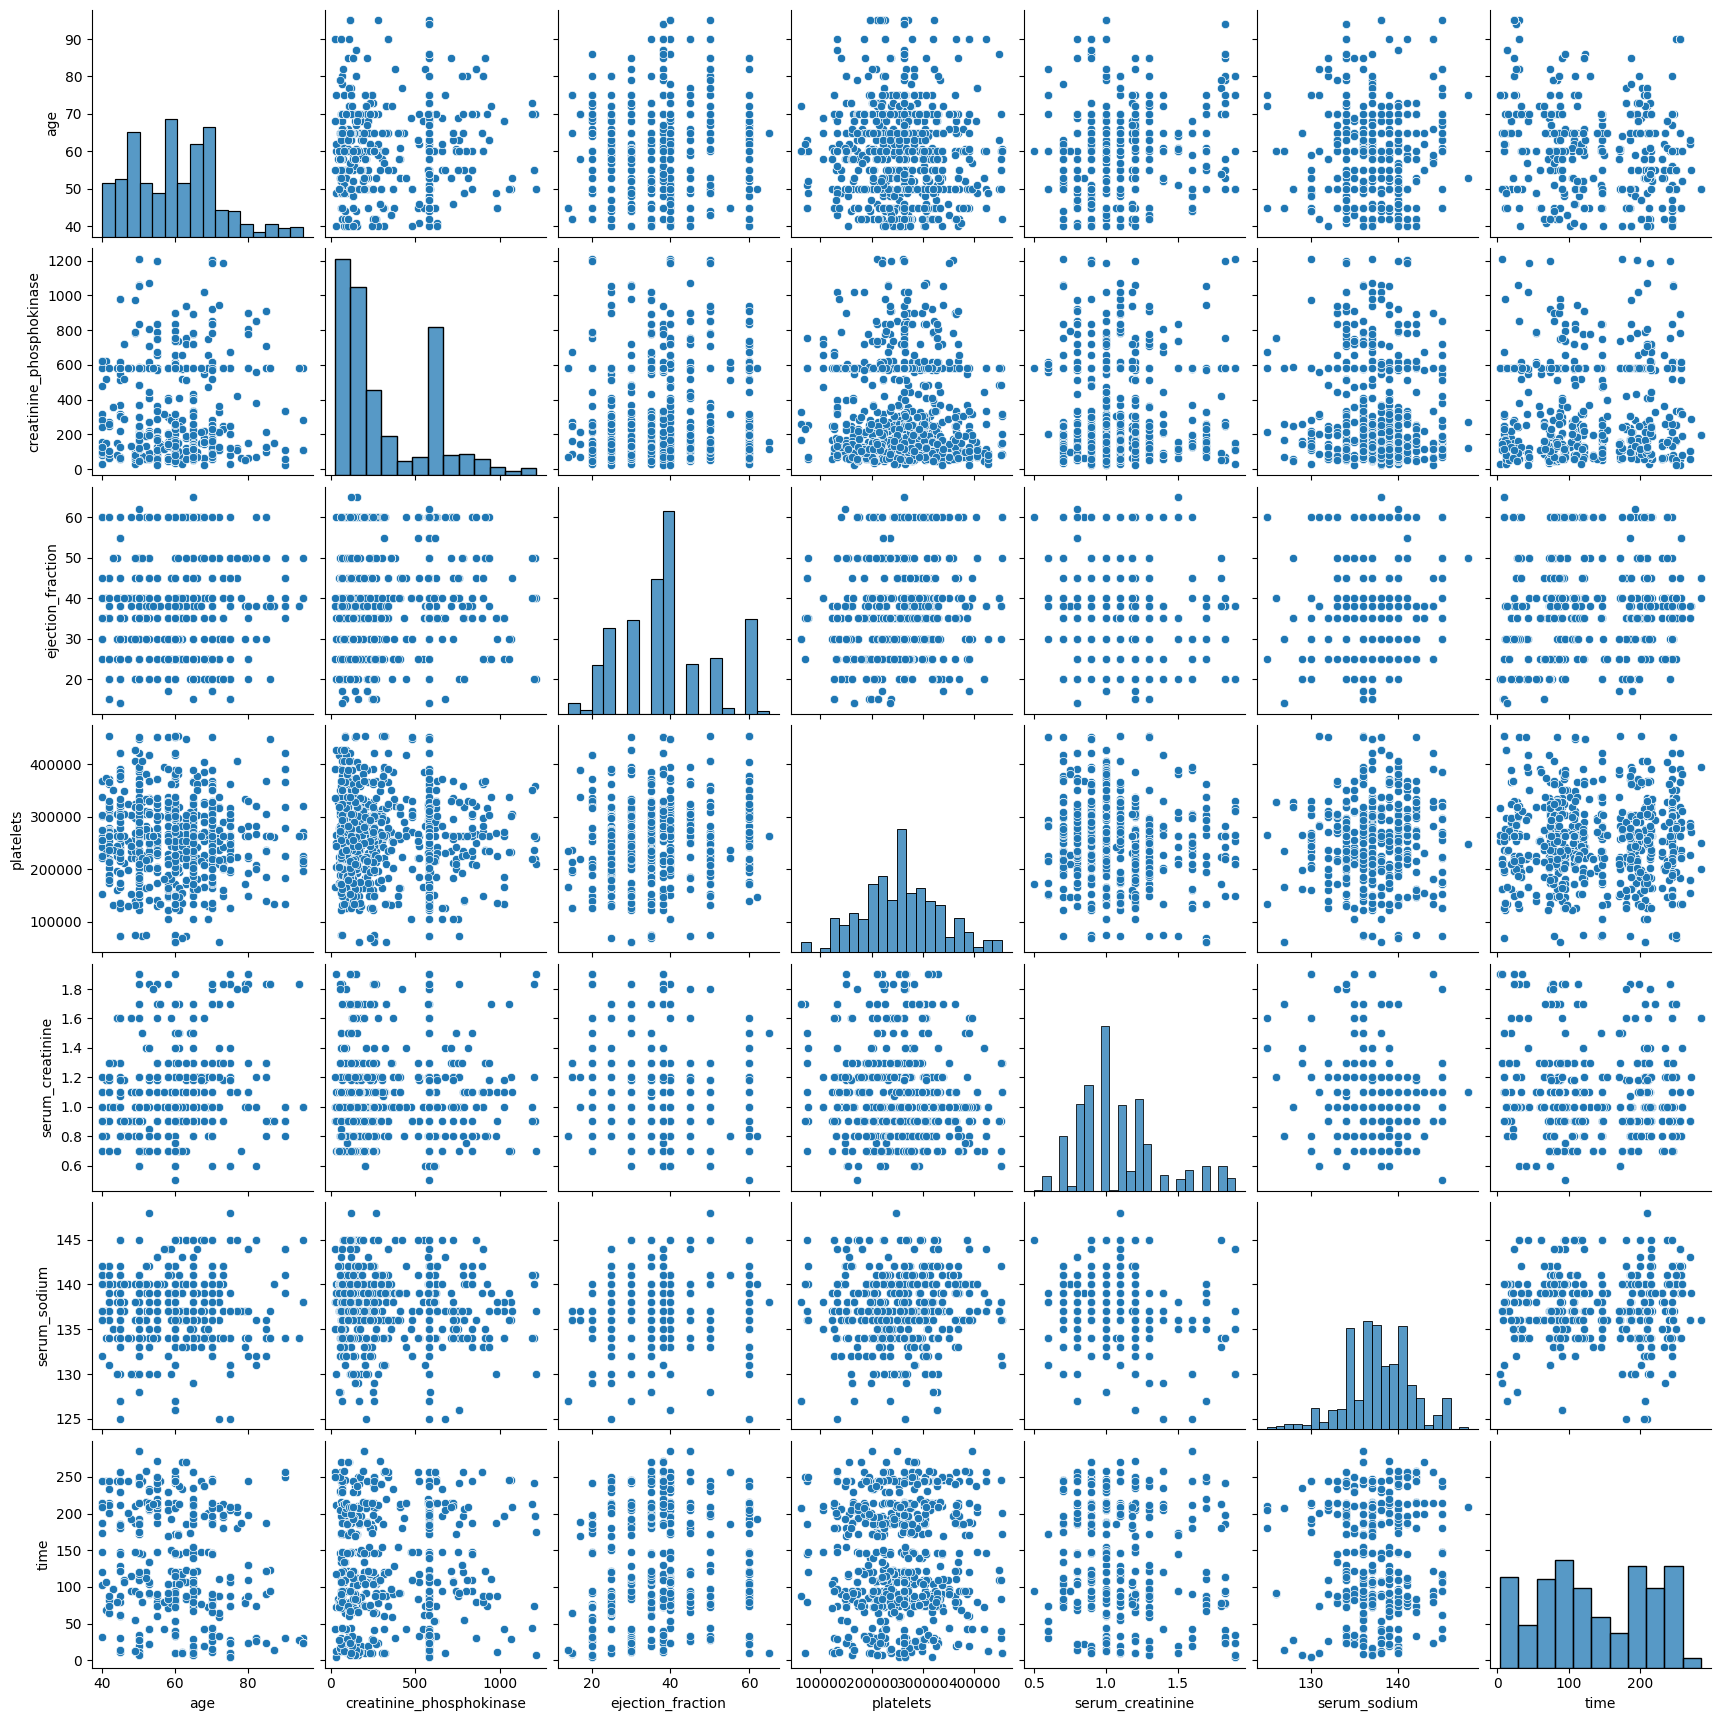

In [22]:
sns.pairplot(numerical_data)
plt.show()

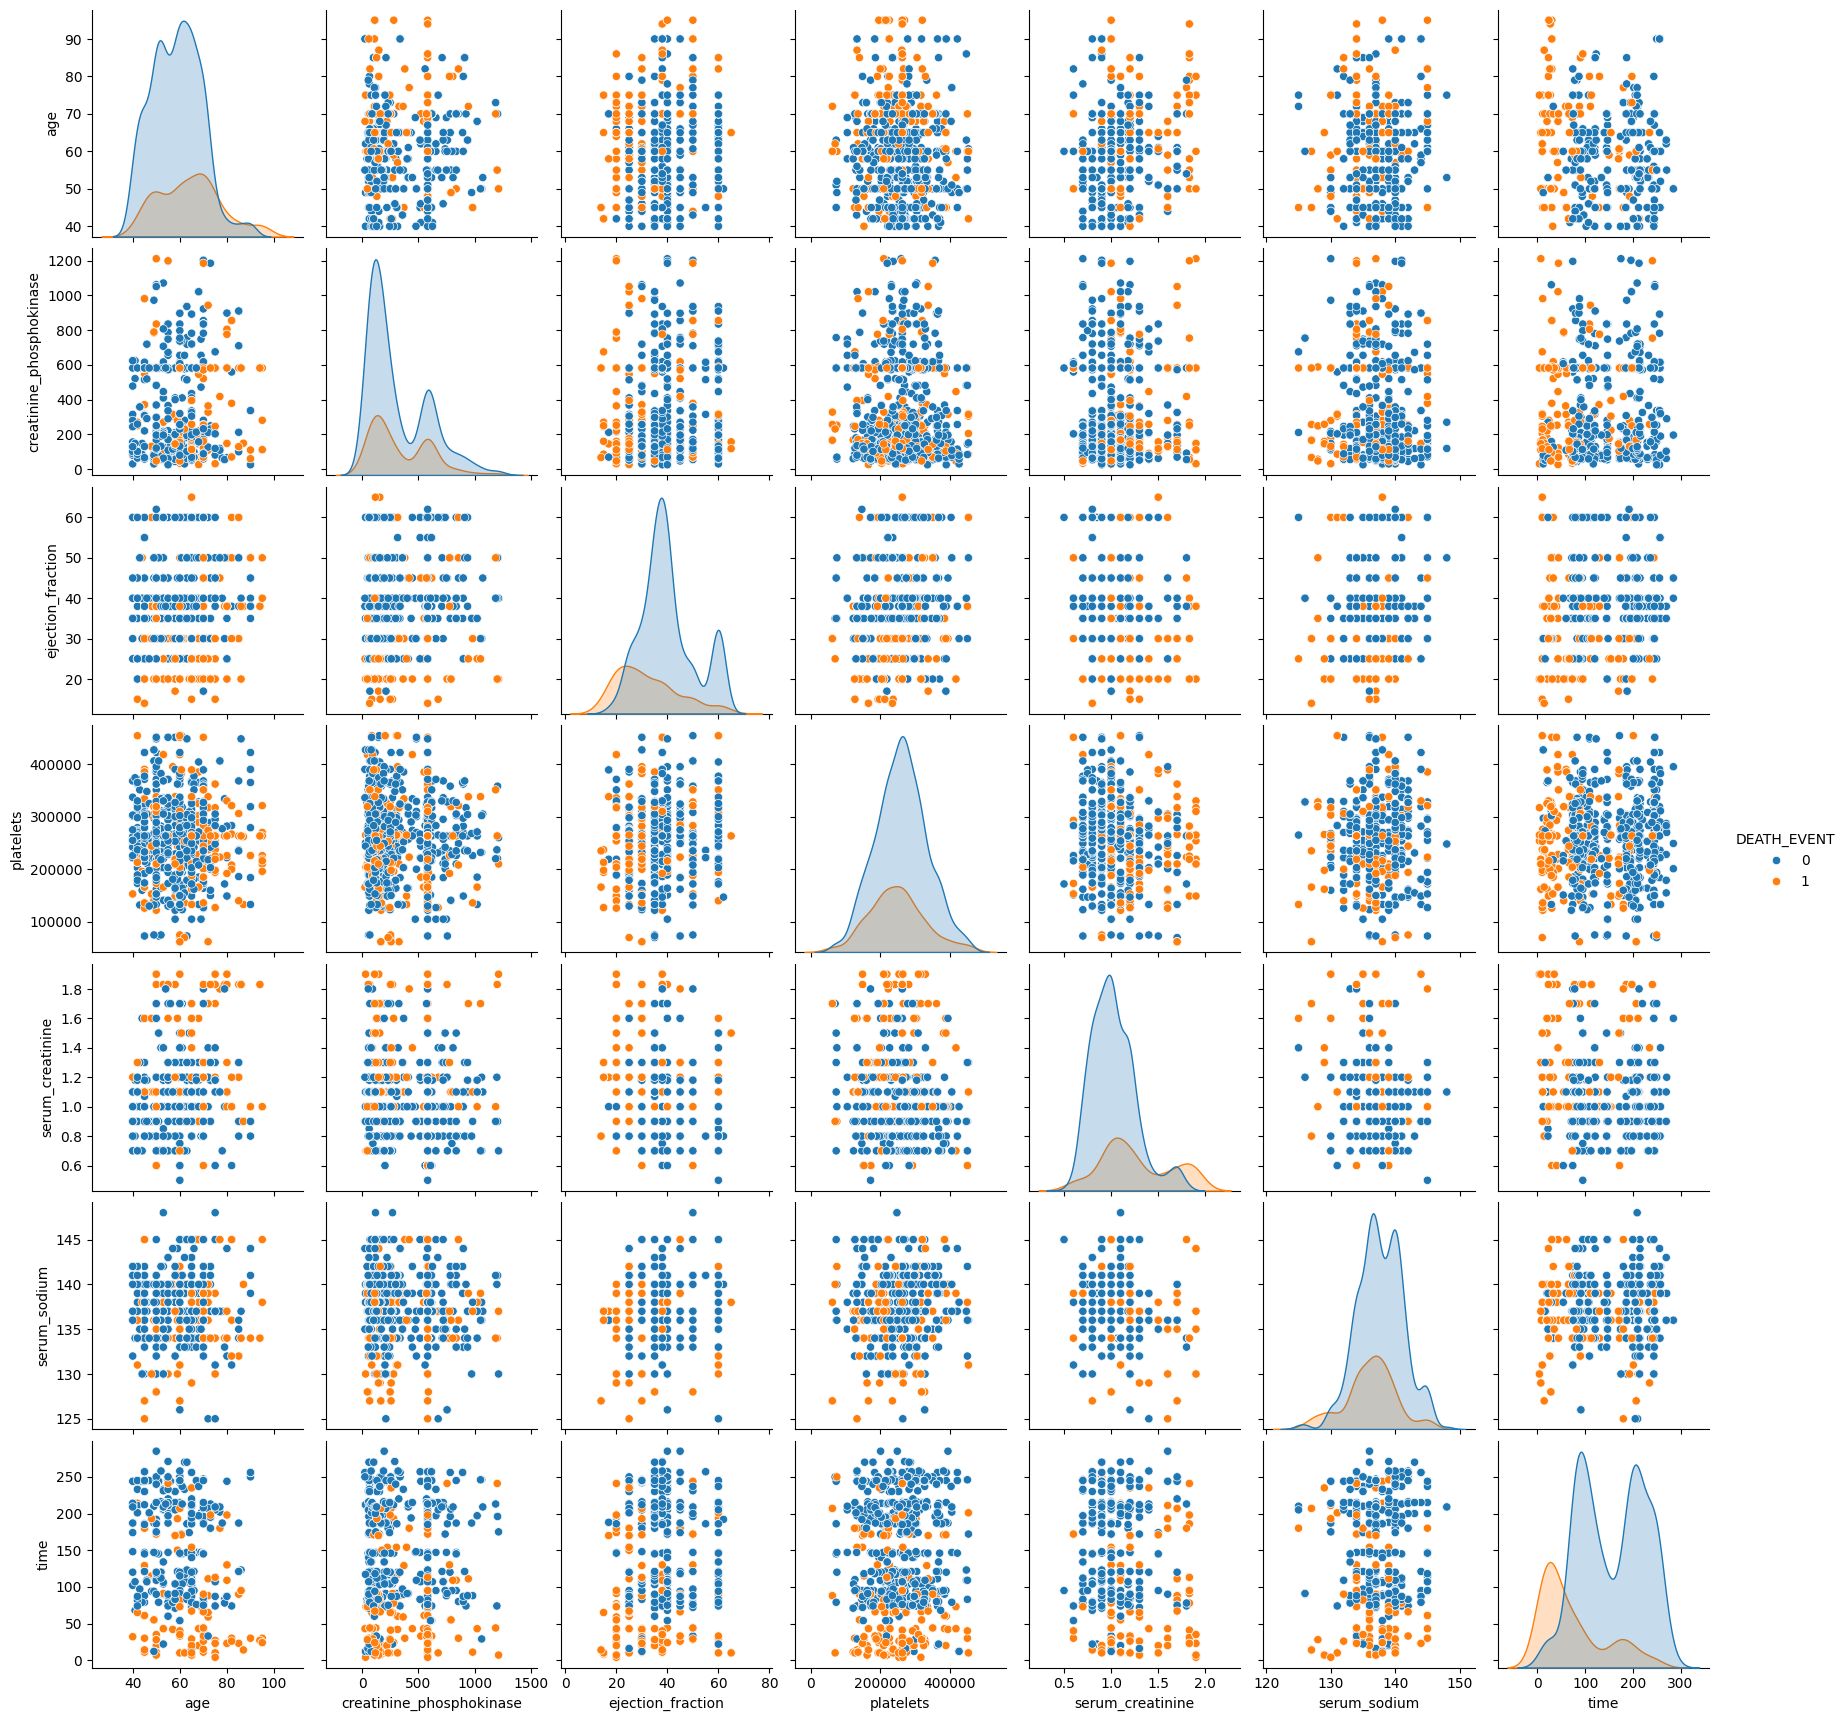

In [23]:
sns.pairplot(df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']],hue="DEATH_EVENT")
plt.show()

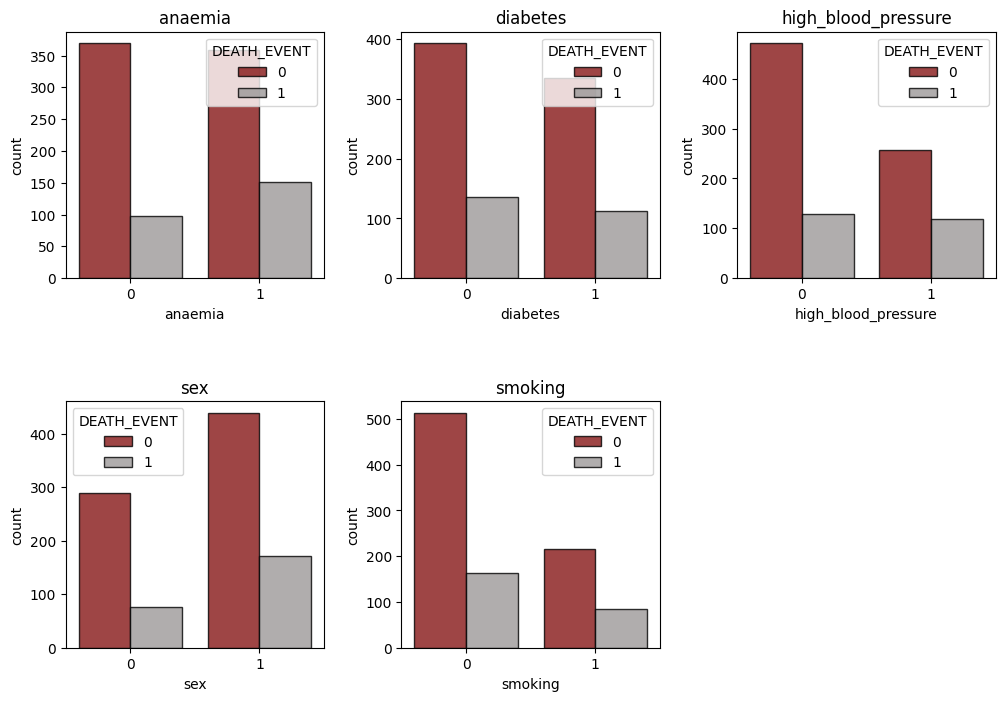

In [24]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_data):
    if i == len(categorical_data.columns) - 1:
        continue

    plt.subplot(2, 3, i + 1)
    plt.title(col)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.countplot(data=df, x=col, hue="DEATH_EVENT", palette=["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

In [25]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
feature_names = df.columns.tolist()
feature_names

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [28]:
# Create the LassoCV model
lasso_cv = LassoCV(cv=5)

# Fit the LassoCV model
lasso_cv.fit(X_scaled, y)

# Get the best alpha value
best_alpha = lasso_cv.alpha_

# Print the best alpha value
print("Best alpha:", best_alpha)

Best alpha: 0.004450220475210938


In [29]:
# Create the Lasso model
lasso = Lasso(alpha=best_alpha)

# Fit the Lasso model
lasso.fit(X_scaled, y)

# Get the coefficients and corresponding feature names
coefficients = lasso.coef_

# Print the coefficients and feature names
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

age: 0.05265963519454541
anaemia: 0.03203686230709915
creatinine_phosphokinase: 0.023834056487258302
diabetes: 0.0024753790770148804
ejection_fraction: -0.08420979588568259
high_blood_pressure: 0.0013409558192306237
platelets: -0.0012763280199551928
serum_creatinine: 0.09096404254560951
serum_sodium: -0.03599493509617515
sex: 0.010391968980493198
smoking: 0.007140767109622626
time: -0.17462564075187248


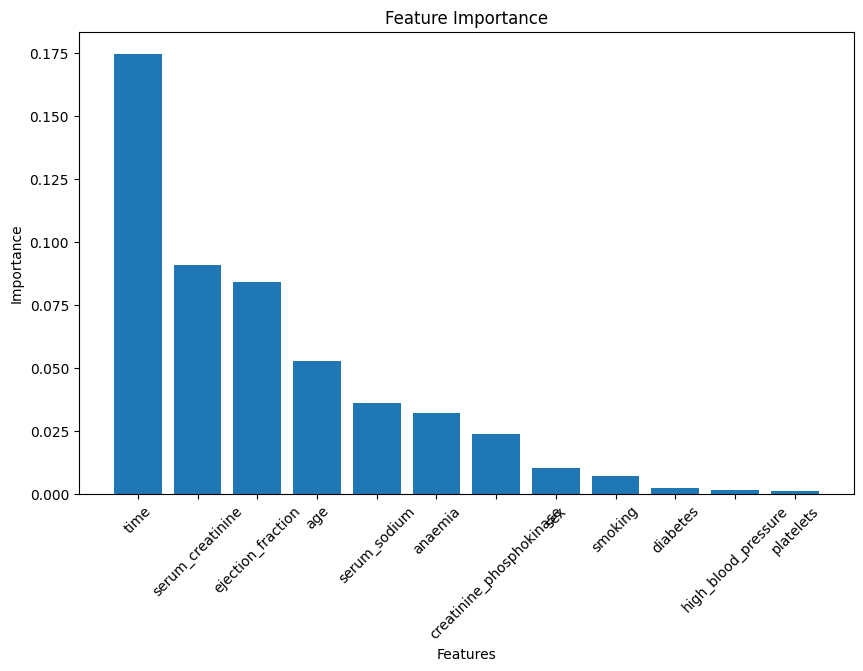

In [30]:
# Get feature importance
feature_importance = np.abs(lasso.coef_)

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=45)
plt.show()

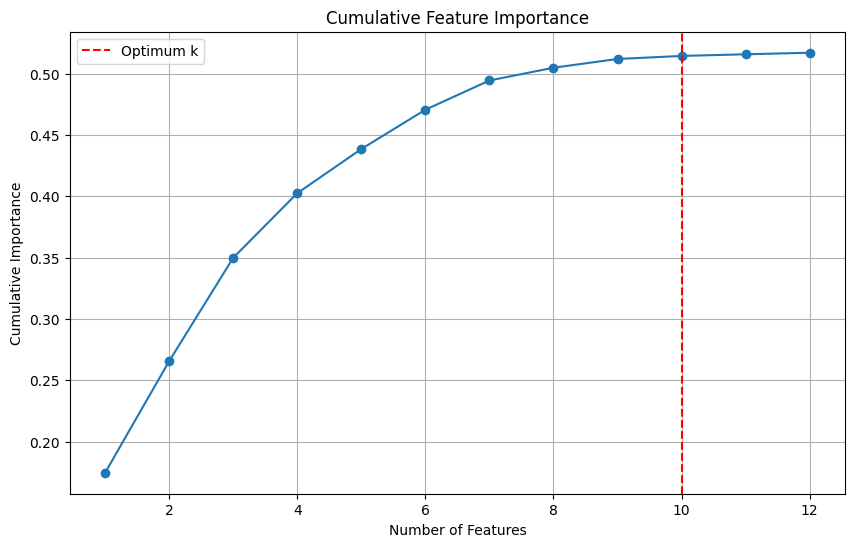

In [31]:
# Calculate cumulative feature importance
cumulative_importance = np.cumsum(sorted_importance)

# Plot cumulative feature importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.grid(True)

# Plot vertical line for optimum number of features
optimum_k = 10  # Replace with the desired optimum number of features
plt.axvline(x=optimum_k, color='r', linestyle='--', label='Optimum k')

plt.legend()
plt.show()

In [32]:
# Get selected 10 features
selected_features = sorted_feature_names[:10].tolist()

print(selected_features)

['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'sex', 'smoking', 'diabetes']


In [33]:
X_selected = X_scaled[:, sorted_indices[:10]]

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [35]:
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (780, 10)
Test data shape: (196, 10)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [37]:
logreg = LogisticRegression(solver='liblinear',random_state=42)

In [38]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

In [39]:
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2']})

In [40]:
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1'}

In [41]:
grid_search.best_score_

0.862820512820513

In [42]:
best_logreg_model = grid_search.best_estimator_

In [43]:
y_pred = best_logreg_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [44]:
print('Accuracy', accuracy_score(y_pred, y_test))

Accuracy 0.8010204081632653


In [45]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       145
           1       0.61      0.67      0.64        51

    accuracy                           0.80       196
   macro avg       0.74      0.76      0.75       196
weighted avg       0.81      0.80      0.80       196



In [46]:
rfc = RandomForestClassifier(random_state=42)

In [47]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

In [48]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]})

In [49]:
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [50]:
grid_search.best_score_

0.964102564102564

In [51]:
best_rfc_model = grid_search.best_estimator_

In [52]:
y_pred = best_rfc_model.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [53]:
print('Accuracy', accuracy_score(y_pred, y_test))

Accuracy 0.9387755102040817


In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       142
           1       0.88      0.91      0.89        54

    accuracy                           0.94       196
   macro avg       0.92      0.93      0.92       196
weighted avg       0.94      0.94      0.94       196



In [55]:
svm = SVC(random_state=42)

In [56]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [57]:
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [58]:
grid_search.best_score_

0.9038461538461539

In [59]:
best_svm_model = grid_search.best_estimator_

In [60]:
y_pred = best_svm_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [61]:
print('Accuracy', accuracy_score(y_pred, y_test))

Accuracy 0.923469387755102


In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       141
           1       0.86      0.87      0.86        55

    accuracy                           0.92       196
   macro avg       0.90      0.91      0.91       196
weighted avg       0.92      0.92      0.92       196

